Zadanie 1

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [4]:
dane = open(r"C:\Users\Rafal\OneDrive\Dokumenty\GitHub\Statystyka-stosowana\danezad1.txt").read().split()
sample = [float(i) for i in dane]

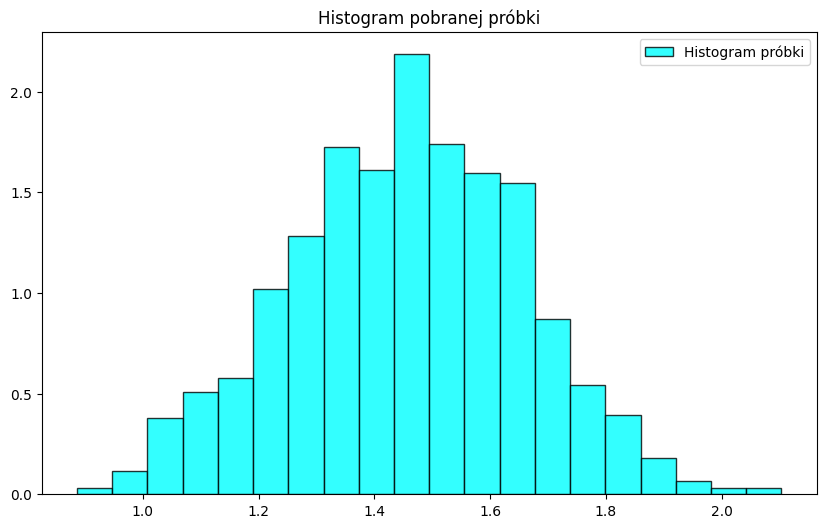

In [14]:
plt.figure(figsize=(10,6))
plt.hist(sample, bins=20, density=True, alpha=0.8, color='cyan', edgecolor='black', label="Histogram próbki")
plt.title("Histogram pobranej próbki")
plt.legend(loc="best")
plt.show()

Hipoteza 1

In [17]:
sample_mean = np.mean(sample)
std = 0.2
n = len(sample)
alpha = 0.05
mi_0 = 1.5

In [18]:
z = (sample_mean - mi_0) * np.sqrt(n) / std

In [21]:
def zbior_krytyczny(alpha):
    return -norm.ppf(1 - alpha/2), norm.ppf(1 - alpha/2)

In [22]:
zk_min, zk_max = zbior_krytyczny(alpha)

In [27]:
x = np.linspace(-8, 8, 1000)
y = norm.pdf(x)

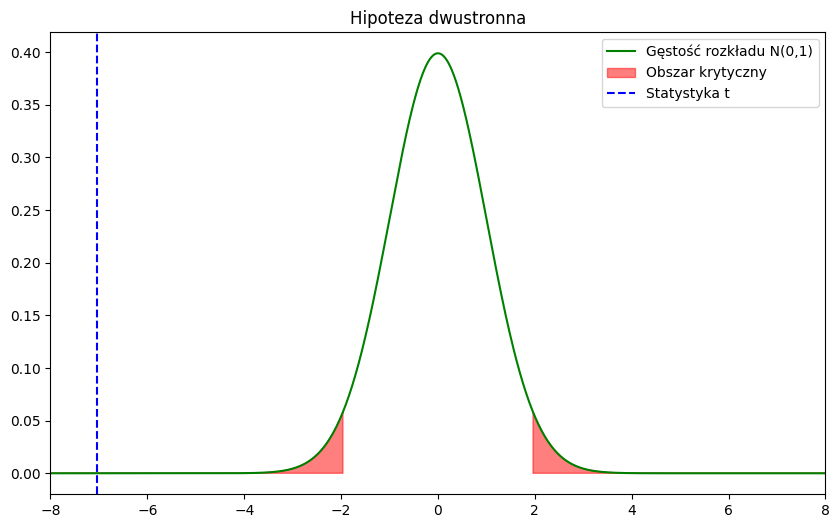

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Gęstość rozkładu N(0,1)', color="green")
plt.fill_between(x, 0, y, where=(abs(x) >= zk_max), color='red', alpha=0.5, label='Obszar krytyczny')
plt.axvline(z, color='blue', linestyle='--', label='Statystyka t')
plt.title('Hipoteza dwustronna')
ax = plt.gca()
ax.set_xlim([-8, 8])
plt.legend()
plt.show()

In [31]:
# Testy hipotez
# H0: μ = 1.5 vs H1: μ ≠ 1.5 (dwustronny)
p_value_two_sided = 2 * (1 - norm.cdf(abs(z)))

# H0: μ = 1.5 vs H1: μ > 1.5 (jednostronny prawostronny)
p_value_one_sided_right = 1 - norm.cdf(z)

# H0: μ = 1.5 vs H1: μ < 1.5 (jednostronny lewostronny)
p_value_one_sided_left = norm.cdf(z)

# Wyznaczanie obszarów krytycznych
z_critical_two_sided = norm.ppf(1 - alpha/2)
z_critical_one_sided = norm.ppf(1 - alpha)

In [33]:
print(f"Średnia z próby: {sample_mean}")
print(f"Statystyka t: {z}")

print("\nHipoteza dwustronna H0: μ = 1.5 vs H1: μ ≠ 1.5")
print(f"p-wartość: {p_value_two_sided}")

print("\nHipoteza jednostronna H0: μ = 1.5 vs H1: μ > 1.5")
print(f"p-wartość: {p_value_one_sided_right}")

print("\nHipoteza jednostronna H0: μ = 1.5 vs H1: μ < 1.5")
print(f"p-wartość: {p_value_one_sided_left}")

Średnia z próby: 1.45546595425
Statystyka t: -7.041450899607091

Hipoteza dwustronna H0: μ = 1.5 vs H1: μ ≠ 1.5
p-wartość: 1.9024781749976682e-12

Hipoteza jednostronna H0: μ = 1.5 vs H1: μ > 1.5
p-wartość: 0.9999999999990488

Hipoteza jednostronna H0: μ = 1.5 vs H1: μ < 1.5
p-wartość: 9.51241291241344e-13


Hipoteza 2

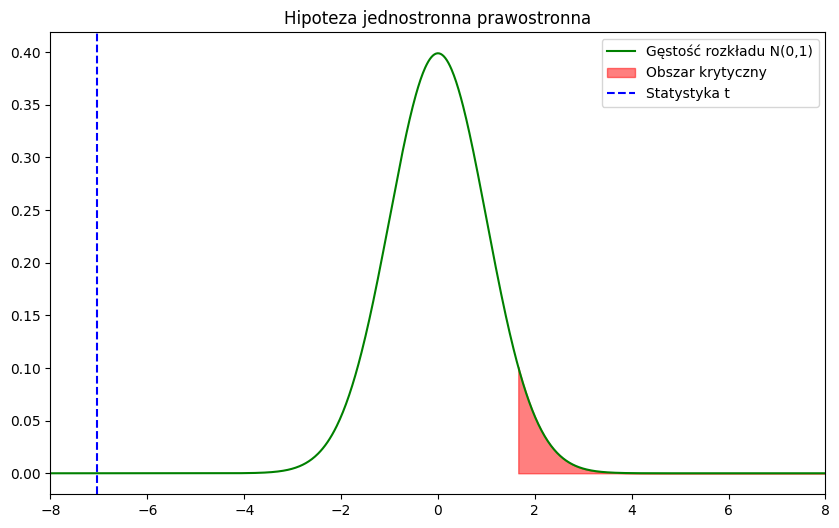

In [37]:
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Gęstość rozkładu N(0,1)', color="green")
plt.fill_between(x, 0, y, where=(x >= z_critical_one_sided), color='red', alpha=0.5, label='Obszar krytyczny')
plt.axvline(z, color='blue', linestyle='--', label='Statystyka t')
plt.title('Hipoteza jednostronna prawostronna')
ax = plt.gca()
ax.set_xlim([-8, 8])
plt.legend()
plt.show()

Hipoteza 3

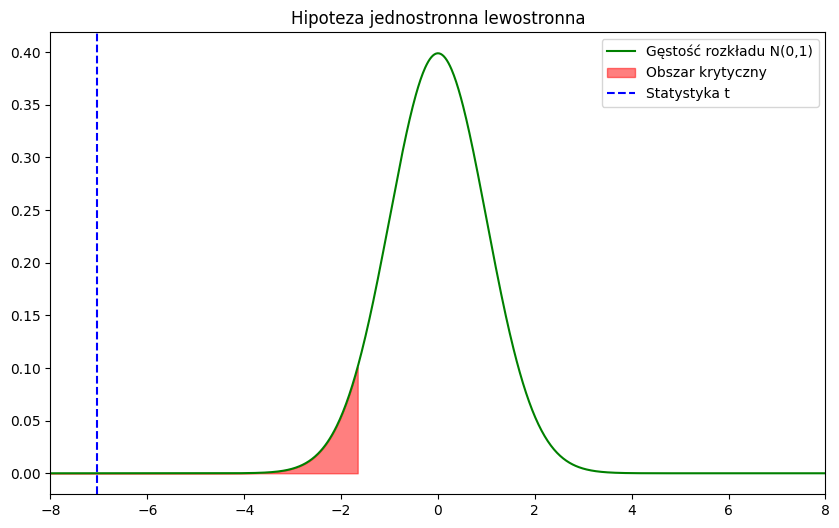

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Gęstość rozkładu N(0,1)', color="green")
plt.fill_between(x, 0, y, where=(x <= -z_critical_one_sided), color='red', alpha=0.5, label='Obszar krytyczny')
plt.axvline(z, color='blue', linestyle='--', label='Statystyka t')
plt.title('Hipoteza jednostronna lewostronna')
ax = plt.gca()
ax.set_xlim([-8, 8])
plt.legend()
plt.show()